# <center> Générateurs de nombres aléatoires <br> TP1 - Générateurs à Congruence Linéaire (GCL)</center>
<center> 2023/2024 - L. Naert/A. Ridard </center>

## Le générateur à congruence linéaire

In [2]:
import datetime as dt
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

> **Question 1 :**
> Ecrire une fonction `monGCL(a,b,m,s)` qui, à partir d'un état $s$, retourne le nouvel état : $as + b$ mod $m$


In [3]:
# Réponse
def monGCL(a, b, m, s) :
    return (a*s+b)%m
    
try:
    assert monGCL(3,5,10,2) == 1
    assert monGCL(3,5,10,1) == 8
    assert monGCL(3,5,10,8) == 9
    print("monGCL : OK")
except:
    print("monGCL : ERREUR")


monGCL : OK


> **Question 2 :**
> Faire une fonction `findPeriod(a,b,m,g)` qui retourne la séquence d'états internes $s$ générée par le GCL jusqu'à la première répétition ainsi que la valeur de la période. (g désigne la graine, g=$s_0$)

In [4]:
def findPeriod(a, b, m, g):
    L = []
    L.append(g)
    tmp = monGCL(a, b, m, g)
    while(tmp not in L):
        L.append(tmp)
        tmp = monGCL(a,b,m,tmp)
        
    L.append(tmp)
    i = L.index(tmp)+1
    while(tmp != L[i]):
        i = i + 1

    return L, i - L.index(tmp)


try:
    assert findPeriod(3,5,10,2) == ([2, 1, 8, 9, 2], 4)
    assert findPeriod(3,5,10,0) == ([0, 5, 0], 2)
    assert findPeriod(4,4,10,1) == ([1, 8, 6, 8], 2)
    print("findPeriod : OK")
except:
    print("findPeriod : ERREUR")

findPeriod : OK


> **Question 3 :**
- A partir des graines suivantes, générer les entiers avec $a=25$, $b=16$, $m=256$ jusqu'à la première répétition, et préciser la période : <br>
$s_0=125$, $s_0=96$, $s_0=50$ et $s_0=10$
- Expliquer pourquoi ce générateur n'est pas satisfaisant

Si m est divisible par 4 alors la seed -1 l'est aussi hors ce n'est pas le cas pour 96,50 et 10.

In [5]:
a,b,m = 25,16,256
findPeriod(a,b,m,125)
findPeriod(a,b,m,96)
findPeriod(a,b,m,50)
findPeriod(a,b,m,10)

([10, 10], 1)

Réponse : 
Todo

> **Question 4 :**
> A partir de la graine $s_0=5$, générer les entiers avec $a=6$, $b=2$, $m=2^{24}$ jusqu'à la première répétition, et préciser la période. Que remarquez-vous ?

Ceci reboucle du au que nous utilisons de int et que la valeur maximale est de 2147483647 ($2^{31} -1$), donc : 
$6710886 * a + b

In [6]:
findPeriod(6,2,2**24,5)

([5,
  32,
  194,
  1166,
  6998,
  41990,
  251942,
  1511654,
  9069926,
  4087910,
  7750246,
  12947046,
  10573414,
  13108838,
  11544166,
  2156134,
  12936806,
  10511974,
  12740198,
  9332326,
  5662310,
  419430,
  2516582,
  15099494,
  6710886,
  6710886],
 1)

> **Question 5 :**
- Ecrire une fonction **monGCL_N**$(a, b, m, g, N)$ qui retourne la liste des $N$ entiers $s_0, s_1, ..., s_{N-1}$ générés à partir de la graine $s_0 = g$ et la relation de récurrence $s_n = f(s_{n-1})$ avec $f(s) = as + b$ mod $m$
- Tester la fonction pour retrouver, au passage, la séquence de la question 4
- Implémenter une ou plusieurs des possibilités de GCL avec une période maximale du diapo 17 de cours 1. La période est-elle bien maximale ?

In [7]:
# Réponse
def monGCL_N(a,b,m,g,N):
    """
    Cette fonction retourne la liste des N entiers s_0, s_1, ..., s_{N-1} générés
    à partir de la graine s_0 = g et la relation de récurrence s_{k+1} = f(s_k) avec f(s) = as + b mod m 
    """
    L = [g]
    for i in range(1, N):
        g= monGCL(a,b,m,g)
        L.append(g) 
    return L

try: #A remplir pour tester que la solution de la question 4 est la même que celle de la question 5
    assert findPeriod(1,5,16,4)[0]==monGCL_N(1,5,16,4,len(findPeriod(1,5,16,4)[0]))
    print("monGCL_N : OK")
except:
    print("monGCL_N : ERREUR")



monGCL_N : OK


*Remarque : pour initialiser la graine, on pourra utiliser l'horloge de l'ordinateur*

In [8]:
date = str(dt.datetime.now())
s = int(date[-4:])
print(s)

4143


## Le générateur multi-récursif

> **Question 6 :**
- Ecrire une fonction `monGMR_N(a1,a2,a3,m,g,N)` qui retourne la liste des $N$ triplets $\left(s_0^{(1)}, s_0^{(2)}, s_0^{(3)}\right), \left(s_1^{(1)}, s_1^{(2)}, s_1^{(3)}\right), ..., \left(s_{N-1}^{(1)}, s_{N-1}^{(2)}, s_{N-1}^{(3)}\right)$ générés à partir de la graine $\left(s_0^{(1)}, s_0^{(2)}, s_0^{(3)}\right) = g$ et la relation de récurrence $\left(s_n^{(1)}, s_n^{(2)}, s_n^{(3)}\right) = f\Big(\left(s_{n-1}^{(1)}, s_{n-1}^{(2)}, s_{n-1}^{(3)}\right)\Big) = \left(s_{n-1}^{(2)}, s_{n-1}^{(3)}, a_1s_{n-1}^{(1)} + a_2s_{n-1}^{(2)} + a_3s_{n-1}^{(3)} \mod m\right)$
- Ajouter un test pour vérifier que vous obtenez bien les valeurs calculées dans le cas de l'exercice du diapo 21 du cours (question 2).

In [9]:
# Réponse
# g est ici une liste de 3 entiers
def monGMR_N(a1, a2, a3, m, g, N) :
    L = []
    L.append(g)
    for i in range(N - 1):
        new_g = L[i].copy()
        tmp =(new_g[0] * a1 + new_g[1] * a2 + new_g[2] * a3)%m 
        new_g[0] = new_g[1]
        new_g[1] = new_g[2]
        new_g[2] = tmp
        L.append(new_g)
    return L

# Initialisation au hasard
#g = list(npr.randint(1000, size=3))

try: 
    
    assert monGMR_N(0, 1403580, -810728, 2**32 - 209, [10,5,3], 5) == [[10, 5, 3], 
                                                                [5, 3, 4585716], 
                                                                [3, 4585716, 1677346834], 
                                                                [4585716, 1677346834, 2993617742], 
                                                                [1677346834, 2993617742, 3127246628]]

    assert monGMR_N(2,0,5,10,[1,0,3],5) == [[1, 0, 3], [0, 3, 7], [3, 7, 5], [7, 5, 1], [5, 1, 9]]
    print("monGMR_N : OK")
except:
    print("monGMR_N : ERREUR")




monGMR_N : OK


## Le générateur MRG32k3

> **Question 7 :**
> Programmer une fonction `monMRG32k3_N(g,N)` qui retourne la liste des $N$ __réels__ entre 0 et 1 à partir de la graine $g$ (voir diapo 22/23 du cours 1)

In [10]:
# Réponse
# g est ici une liste de 6 élements, 
# les 3 premiers désigne la graine du première GMR et les 3 suivants la graine du deuxième
def monMRG32k3_N(g, N) :
    L = []
    m1 = 2**32 - 209
    g1 = [g[0],g[1],g[2]]
    g2 = [g[3],g[4],g[5]]
    S1 = monGMR_N(0,1403580,-810728,m1,g1,N)
    S2 = monGMR_N(527612,0,-1370589,2**32 - 22853,g2,N)

    for i in range(N):
        tmp = ((S1[i][2] - S2[i][2]) % m1) / m1
        L.append(tmp)

    return L

try: 
    g=[1,2,3,4,5,6]
    assert monMRG32k3_N(g,3) == [0.9999999993015081, 0.001515891942386845, 0.4304798091692571]
    print("monMRG32k3_N : OK")
except:
    print("monMRG32k3_N : ERREUR")

monMRG32k3_N : OK


## Qualité d'un générateur de nombres aléatoires


Supposons qu’on génére à l'aide d'un GNA, une suite de nombres réels entre 0 et 1. Il est difficile de comparer une telle suite déterministe (sauf pour le choix de la graine) avec une suite aléatoire. Pour cela, il faut d’abord choisir un critère de qualité, de préférence, simples et pertinents. 

Nous allons tester ici deux critères : 
- la fréquence d'apparition de chaque valeur (test spectral de dimension 1)
- l’indépendance de deux termes consécutifs (test spectral de dimension 2)

> **Question 8 (fréquence d'apparition) :**

Générer les 1001 premiers réels en utilisant : 
- Le GCL de la question 4
- Le générateur MRG32k3 avec une graine aléatoire
- Le générateur npr.rand de Python
  
Observer les fréquences d'apparition de chaque valeur à l'aide de l'histogramme, que remarquez-vous ? 

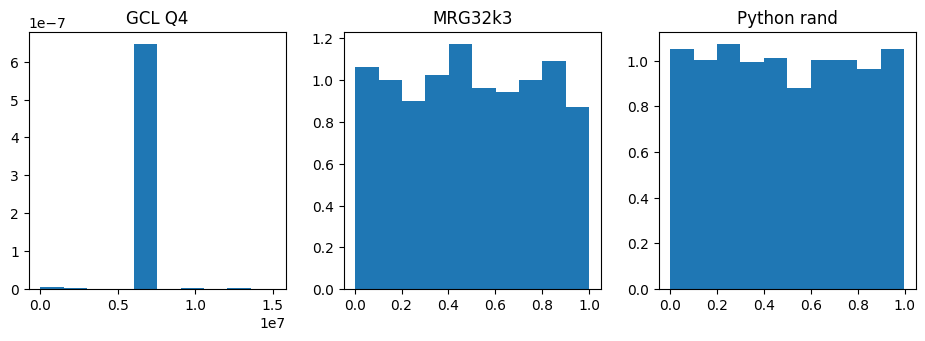

In [11]:
# Réponse
g = list(npr.randint(1000, size=6)) # une graine "aleatoire" de taille 6

x_GCL = monGCL_N(6,2,2**24,5,1001)

x_MRG32k3 = monMRG32k3_N(g,1001)

x_Python = npr.rand(1001)

# Pour mettre les 3 figures côte à côte
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.tight_layout(rect = [0, 0,1.5,1.5])
ax1.set_title('GCL Q4')
ax1.hist(x_GCL, density=True)
ax1.set_box_aspect(1)

ax2.set_title('MRG32k3')
ax2.hist(x_MRG32k3, density=True)
ax2.set_box_aspect(1)

ax3.set_title('Python rand')
ax3.hist(x_Python, density=True)
ax3.set_box_aspect(1)
plt.show()

> **Question 9 (Indépendance de deux valeurs consécutives) :** Pour cela, on représente graphiquement les points $(x_k, x_{k+1})$ dans le carré $[0, 1]^2$. Un générateur sera bon (pour ce critère) s’il remplit assez rapidement tout le carré.

> Construire un vecteur $(x_0, x_1, \dots, x_{1000})\in [0, 1]^{101}$, pour chacun des générateurs suivants (ou réutiliser ceux de la question précédente), puis représenter les points $(x_k, x_{k+1})$ pour :
- Le GCL de la question 4
- Le générateur MRG32k3
- Le générateur de Python

> Commenter les résultats obtenus.
> 

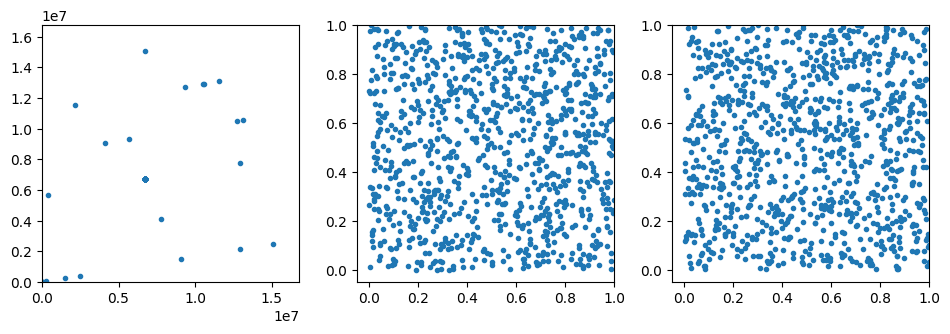

In [12]:
# Réponse
g = list(npr.randint(1000, size=6)) # une graine "aleatoire" de taille 6

x_GCL = monGCL_N(6,2,2**24,5,1001)

x_MRG32k3 = monMRG32k3_N(g,1001)

x_Python = npr.rand(1001)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.tight_layout(rect = [0, 0, 1.5, 1.5])

#ax1.set_title('GCL')
ax1.set_xlim(-0.05, 2**24)
ax1.set_ylim(-0.05, 2**24)
ax1.set_aspect(aspect = 'equal')# graphique orthonormé : meme longueur pour x et y -> carre
x = x_GCL[1:]
y = x_GCL[:-1]
ax1.plot(x, y, '.')

#ax2.set_title('MRG32k3')
ax2.set_xlim(-0.05, 1)
ax2.set_ylim(-0.05, 1)
ax2.set_aspect(aspect = 'equal')
x = x_MRG32k3[1:]
y = x_MRG32k3[:-1]
ax2.plot(x, y, '.')
             
#ax3.set_title('Python')
ax3.set_xlim(-0.05, 1)
ax3.set_ylim(-0.05, 1)
ax3.set_aspect(aspect = 'equal')
x = x_Python[1:]
y = x_Python[:-1]
ax3.plot(x, y, '.')

plt.show()

nous voyons que les résultats obtenu sont plutôt bon pour les générateur 2 et 3 car ils occupent la majorité de la surface. Pour le 1er cependant, ceci n'occupent pas beaucoup d'espace, il est donc plutôt mauvais. 

Remarques : 

> **Question 10 (test spectral des GCL) :**

> Considérons le GCL défini par :
- $S = \{1, 2, \dots, 100\}$
- $f(s) = as$ mod $101$
- $g(s) = \displaystyle\frac{s}{101}$

> En prenant respectivement les valeurs 51, 7 et 12 pour le paramètre $a$ du générateur, discuter sa qualité selon le critère précédent.

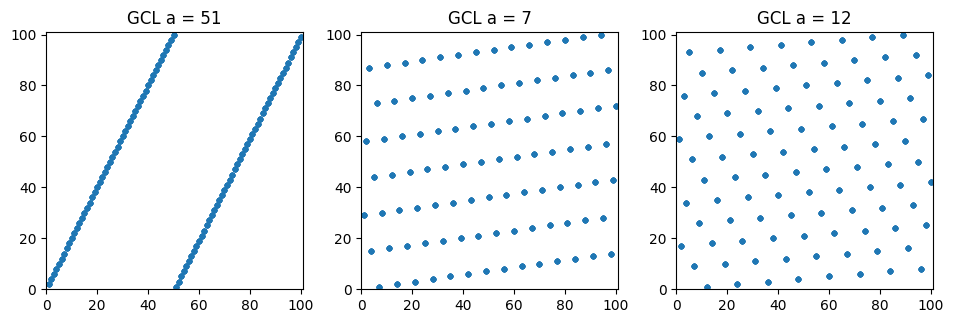

In [13]:
# Réponse
g = npr.randint(100)
x_GCL1 = monGCL_N(51,0,101,5,1001)
x_GCL2 = monGCL_N(7,0,101,5,1001)
x_GCL3 = monGCL_N(12,0,101,5,1001)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.tight_layout(rect = [0, 0, 1.5, 1.5])

ax1.set_title('GCL a = 51')
ax1.set_xlim(-0.05, 101)
ax1.set_ylim(-0.05, 101)
ax1.set_aspect(aspect = 'equal')
x = x_GCL1[1:]
y = x_GCL1[:-1]
ax1.plot(x, y, '.')

ax2.set_title('GCL a = 7')
ax2.set_xlim(-0.05, 101)
ax2.set_ylim(-0.05, 101)
ax2.set_aspect(aspect = 'equal')
x = x_GCL2[1:]
y = x_GCL2[:-1]
ax2.plot(x, y, '.')

ax3.set_title('GCL a = 12')
ax3.set_xlim(-0.05, 101)
ax3.set_ylim(-0.05, 101)
ax3.set_aspect(aspect = 'equal')
x = x_GCL3[1:]
y = x_GCL3[:-1]
ax3.plot(x, y, '.')
plt.show()

Remarques : 

## Attaque sur un GCL

Il s'agit maintenant de retrouver les paramètres d'un GCL (valeurs de $a$, $b$ et éventuellement $m$) à partir de la suite de nombres générée et de la connaissance, ou non de la valeur du modulo $m$. 

Soit $x_1, ..., x_N$ les entiers générés à partir de la graine $x_0$ et la relation de récurrence $x_n = ax_{n-1} + b$ mod $m$.<br>
Posons $y_k = x_{k}-x_{k-1}$ pour $k\geq 1$.

### Cas 1 : $m$ connu

> **Question 11 :**

> Dans le cas où $y_1$ est inversible modulo $m$, montrer : $a = y_2y_1^{-1}$ mod $m$ et $b = x_1 - ax_0$ mod $m$. Pour rappel, $y_1^{-1}$ désigne l'inverse modulaire de $y_1$, c'est à dire le nombre qui multiplié par $y_1$ donne $1$ modulo $m$

Réponse : 


Propriétés : 

- $ a\mod m + b \mod m = (a+b) \mod m$
- $ a\mod m \times b \mod m = (a*b) \mod m$
- $a = b \mod c \equiv b = a \mod c$
- $aa^{-1} \mod m = 1 \mod m$

La fonction `inverseModulaire(mModulo, aNombre)` ci-dessous permet de calculer l'inverse modulaire d'un nombre en utilisant l'algorithme d'Euclide étendu. 
(source : https://github.com/MichaelCaraccio/Cryptographic-Algorithms/blob/master/Python/RSA_diffiehellman/euclide.py)

In [14]:
# Fonctions utiles
def inverseModulaire(mModulo, aNombre):
    """ Algorithme d'Euclide étendu pour trouver l'inverse modulaire 
        Inverse modulaire de a modulo m ---> a * a^-1 mod m = 1 """
    
    modulo = mModulo
    
    x = 0
    y = 1
    u = 1
    v = 0
    
    while aNombre != 0:
        q = mModulo // aNombre
        r = mModulo % aNombre
        
        m = x - u * q
        n = y - v * q
        
        mModulo = aNombre
        aNombre = r
        x = u
        y = v
        u = m
        v = n
        
    return x % modulo if mModulo == 1 else 0
    
    
def pgcd(a, b):
    """Sortie : pgcd de 2 entiers"""
    while b != 0: 
        a, b = b, a%b
    if a < 0:
        a = -a
    return a

def pgcdn(lst_n):
    """Sortie : pgcd de n (>=2) entiers"""
    p = pgcd(lst_n[0], lst_n[1])
    for x in lst_n[2:]:
        p = pgcd(p, x)
    return p

In [15]:
# Réponse
def attaque_GCL_mConnu(x, m):   
    """ Entrée : liste x de la suite des valeurs générées par le GCL,
        et m le modulo connu
        Sorties : a et b les coefficients de la fonction (affine) de transition
    """
    """v1 mais trop lente (vu que pas optimisé)
    for a in range(1,m):
        for b in range(m):
            status = True
            for i in range(len(x)-1):
                if ((a*x[i]+b)%m != x[i+1]):
                    status = False
                    break
            if status:
                return a,b

    return None
    """
    reverse = inverseModulaire(m, x[1]- x[0])
    
    if(reverse == 0):
        return 0,0
    y = x[2] - x[1]
    a = (y*reverse)%m 

    b = x[1] - a*x[0]
    return a,b 

#Application à faire
a,b = attaque_GCL_mConnu([97,188,235,293,604,596,412],1023)

monGCL_N(a,b,1023,97,7)


[97, 188, 235, 293, 604, 596, 412]

> **Question 12 :**
- En sachant que $m = 1023$, déterminer le GCL ayant généré les entiers 97, 188, 235, 293, 604, 596, 412. Pour cela, écrire une fonction `attaque_GCL_mConnu(x, m)` qui prend en entrée la suite $x$ des valeurs générées par le GCL, et $m$ le modulo connu et donne en sortie les valeurs de $a$ et $b$.
- Vérifier le résultat à l'aide de **monGCL_N**$(a, b, m, g, N)$ de la question 5

### Cas 2 : $m$ inconnu

> **Question 13 :**
- Montrer $y_{k+1} \equiv ay_k$ mod $m$.
- Posons $z_k = y_{k+1}y_{k-1}-y_k^2$, déduire de la question précédente que $z_k \equiv 0$ mod $m$

##### <font color = pink> 1. démonstration y<sub>k+1</sub> = a * y<sub> k </sub> [m] </font>
Par définition, nous savons que dans un GCL, $y_k = a \times s + b \ [m]$ ou s est la valeur du précédent. Nous avons donc : <br>
$y_k = a \times y_{k-1} + b \ [m] \Rightarrow y_{k+1} = a \times y_k + b [m]$ 

Pour démontrer que $m \mid y_{k+1} - ay_k$ :

- $y_{k+1} - ay_k = ay_k +b - a_yk$
- $y_{k+1} - ay_k = b$

Ceci veux donc dire que que $y_k+1 - ay_k \equiv 0 [m]$ si et seulement si b = 0 (car $0 \leqslant b \ < m$). Ceci implique donc : 
$y_k+1 = m \times q + ay_k$ 

#### <font color = pink>2. déduction de z<sub>k</sub> </font>
Nous avons : $z_k = y_{k+1}y_{k-1}-y_k^2$, Nous posons dans un premier temps :
$y_{k+1} = mq_1 + ay_k$ et $y_k = mq_2 + ay_{k+1}$ <br>
Nous en déduisons donc :
- $z_k = (mq_1 + ay_k) \times y_{k-1}-y_k^2$ 
- $z_k = (mq_1y_{k-1}) + (mq_2 + a^2y_{k-1}) \times y_{k-1} - ((mq_2)^2 + 2mq_2ay_{k-1} +(ay_{k-1})^2) $ 
- $z_k = m(q_1y_{k-1} - mq_2^2 + q_2y_{k-1}) + (ay_{k-1})^2 - (ay_{k-1})^2$
- $z_k = m(q_1y_{k-1} - mq_2^2 + q_2y_{k-1})$

Nous obtenons donc $z_k \equiv 0 [m]$

Réponse : 

Tous les $z_k$ sont donc des multiples de $m$, autrement dit $m$ est un diviseur commun de tous les $z_k$ et "très probablement" le PGCD de tous les $z_k$

> **Question 14 :**
- A l'aide de la remarque précédente, déterminer le GCL ayant généré les entiers suivants :
<center> 234, 1227, 12158, 2475, 26787, 30101, 12498, 18328, 76, 11400 </center>
Pour cela, écrire une méthode `attaque_GCL_mInconnu(x)` qui donne en sortie, les coefficients $a$, $b$ et le modulo $m$ à partir de la séquence $x$ des entiers générés. 
- Combien d'entiers suffisent pour déterminer ce GCL ?

In [16]:
# Réponse


def attaque_GCL_mInconnu(x):  
    """ Entrée : liste x de la suite des valeurs générées par le GCL
        Sorties : a et b les coefficients de la fonction (affine) de transition et m le modulo
        (et nbEntiers : le nombre d'entiers minimum dont on a eu besoin)
    """
    solve = []
    for i in range(2, len(x)-1):
        solve.append((x[i+1]-x[i]) * (x[i-1]-x[i-2]) - (x[i]-x[i-1])**2) 

    
    div = pgcdn(solve)
    return attaque_GCL_mConnu(x,div), div
     
    
x = [234, 1227, 12158, 2475, 26787, 30101, 12498, 18328, 76, 11400 ]
print(attaque_GCL_mInconnu(x))
x = [476701654, 1778738775, 130368836, 1085367853, 209217378, 1452282099, 123, 234, 345, 456, 567]
print(attaque_GCL_mInconnu(x))
x = [476701654, 1778738775, 130368836, 1085367853, 209217378, 1452282099, 259223984, 1592473641, 1845073838, 1578158415]
print(attaque_GCL_mInconnu(x))
#Application à faire



((143, -32235), 32767)
((0, 0), 1)
((1103515245, -526047540726976455), 2147483648)
